# Veri Ön İşleme

* Veri Temizleme
    * Gürültülü Veri
    * Eksik Veri Analizi
    * Aykırı Gözlem Analizi
* Veri Standardizasyonu
    * 0-1 Dönüşümü
    * z-skoruna Dönüştürme
    * Logaritmik Dönüşüm
* Veri İndirgeme
    * Gözlem Sayısının Azaltılması
    * Değişken Sayısının Azaltılması
* Değişken Dönüşümleri
    * Sürekli değişkenlerde dönüşümler
    * Kategorik değişkenlerde dönüşümler

## Aykırı Gözlem Analizi

* **Aykırı Gözlem :** Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere denir.
* **Aykırı Değer :** Aykırılığı ifade eden nümerik değere denir.
* Aykırı değer, genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonları yanıltır. Yanlılığa sebep olur.
* Eğer kurulan modelin bir genelleme kaygısı varsa, zaten çok seyrek olan senaryolar ve genele uymayan yapılar çalışma alanının dışında bırakılmalıdır.

### Aykırılığı Tanımlama

1. **Sektör Bilgisi**
    * Ev fiyat tahmin modellemesi için konuşmak gerekirse Türkiye genelindeki evlerin geneli $200 m^2$ altında olduğunu düşündüğümüzde $1000 m^2$lik evleri modellememize dahil etmeyiz. 
2. **Standart Sapma Yaklaşımı**
    * Bir değişkenin ortalamasının üzerine aynı değişkeneşn standart sapması hesaplanarak eklenir. 1, 2 veya 3 standart tsapma değeri ortalama üzerine eklenerek ortaya çıkan değer eşik değeri olarak nitelendirilir. Bu değerden yukarıda veya aşağıda olan değerlere aykırı değer denir.
    * Eşik Değer = Ortalama + {1,2,3} * Standart Sapma
3. **z-skoru Yaklaşımı**
    * Standart sapma yöntemine benzer bir şekilde çalışır. Değişken standart normal dağılıma uyarlanır, yani standartlaştırılır. Örnek olarak dağılımın sağından ve solunda +-2,5 değerine göre bir eşik değer konulur ve bu değerin üzeri veya altındaki değerler aykırı olarak işaretlenir.
4. **Boxplot(Interquartile range - IQR) Yöntemi
    * En sık kullanılan yöntemlerden bir tanesidir. Değişken değerleri küçükten büyüğe doğru sıralanaır. Çeyrekliklerine Q1,Q3 değerlerine karşılık gelen değerler üzerinden bir eşkdeğeri hesaplanır ve bu eşik değerine göre aykırı değerlerin tanımı yapılır.
    * IQR = 1,5 * (Q3 - Q1)
    * Alt Eşik Değeri = Q1 - IQR
    * Üst Eşik Değeri = Q3 + IQR

#### Aykırı Değeleri Yakalamak

Tek değişken üzerinde aykırı değerleri boxplot yardımıyla tespit edeceğiz. Bu örnekte table değişkenini kullanacağız.

In [13]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [14]:
table = df["table"]
table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

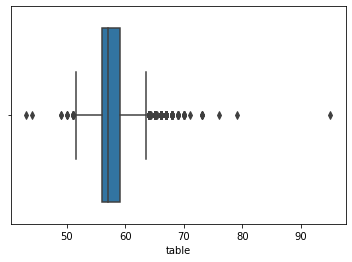

In [15]:
sns.boxplot(x=table);

In [16]:
Q1 = table.quantile(0.25)
Q1

56.0

In [17]:
Q3 = table.quantile(0.75)
Q3

59.0

In [18]:
IQR = 1.5 * (Q3-Q1)
IQR

4.5

In [19]:
altsinir = Q1 - IQR
altsinir

51.5

In [21]:
ustsinir = Q3 + IQR
ustsinir

63.5

In [25]:
df[(table<altsinir) | (table>ustsinir)]

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [26]:
df[(table<altsinir) | (table>ustsinir)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

### Aykırı Değer Problemini Çözmek

Üç farklı şekilde çözebiliriz:
    * Silme Yöntemi
    * Ortalama Yöntemi
    * Baskılama Yöntemi

#### Silme Yöntemi
Aykırı olan değerleri tablodan eleriz.

In [40]:
df = sns.load_dataset("diamonds")
df.dropna()
table = df["table"]
table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [41]:
table = table[~((table<altsinir) | (table>ustsinir))]
table

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

#### Ortalama Yöntemi
Aykırı değerler yerine veri setinin ortalaması yerleştirilir.

In [50]:
df = sns.load_dataset("diamonds")
df = df.dropna()
table = df["table"]
table[((table<altsinir) | (table>ustsinir))] = df.table.mean()
table

<ipython-input-50-2990c720bbe2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[((table<altsinir) | (table>ustsinir))] = df.table.mean()


0        55.000000
1        61.000000
2        57.457184
3        58.000000
4        58.000000
           ...    
53935    57.000000
53936    55.000000
53937    60.000000
53938    58.000000
53939    55.000000
Name: table, Length: 53940, dtype: float64

#### Baskılama Yöntemi
Alt sınırın altında kalan değerler alt eşik değerine eşitlenir. Üst sınırın üstünde kalan aykırı değerler ise üst eşik değerine eşitlenir. Böylece veri setinin yapısına daha uygun bir şekilde işlem yapılır.

In [51]:
df = sns.load_dataset("diamonds")
df = df.dropna()
table = df["table"]
table[(table<altsinir)] = altsinir
table

<ipython-input-51-9f920437f725>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[(table<altsinir)] = altsinir


0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [52]:
table[(table>ustsinir)] = ustsinir
table

<ipython-input-52-d9d73fefbbac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[(table>ustsinir)] = ustsinir


0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

### Çok Değişkenli Aykırı Gözlem Analizi

Local Outlier Factor kullanalarak çok değişkenli aykırı gözlem analizi gerçekleştirilir. Analiz sonucunda aykırı gözlemler veri setinden silme yöntemi kullanılarak elenir.

#### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlar.<br>
Bir noktanın lokal yoğunluğu bu noktanın komşuları ile karşılaştırılır. Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyor yorumu yapılabilir. Dolayısıyla burada bir komşuluk ilişkisi söz konusudur. Bir değerin çevresi yoğun değil ise bu değer aykırı değerdir şeklinde yorumlanır.<br>
**from sklearn.neighbors import LocalOutlierFactor** şeklinde programımıza dahil edilir.
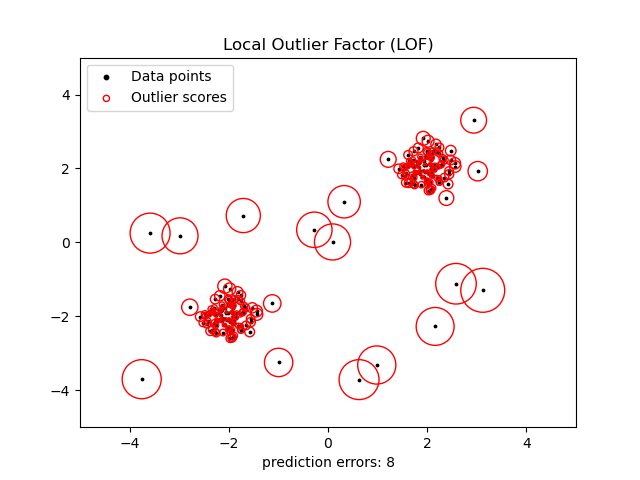

In [53]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(["float64","int64"])
df = df.dropna()

In [54]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

Burada n_neighbors komşu sayısını, contamination ise yoğunluğu belirleyen parametredir.

In [55]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [56]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [63]:
df_scores = clf.negative_outlier_factor_
df_scores[:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

df_scores içerisinde her bir gözlemin yoğunluk skorları bulunmaktadır.

Eşik değeri olacak skoru biz iş stratejimize göre belirleyerek hangi eşikten sonra değerlerin aykırı olacağına karar veriyoruz. Bunun için df_scores'u sıralayıp eşik değerini seçmemiz gerekiyor.

In [65]:
np.sort(df_scores)[:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [67]:
esik_deger = np.sort(df_scores)[7]
esik_deger

-4.370812137890049

In [69]:
# Aykırı Değerler
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09


In [70]:
# Aykırı OLMAYAN Değerler
df[df_scores > esik_deger]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


#### Baskılama Yöntemi

LOF yöntemiyle belirlediğimiz eşik değerine sahip olan gözlemin değerlerini, aykırı olan gözlemlerin değerlerine yerleştirerek bir baskılama işlemi gerçekleştiririz.

Bu işlemi gerçekleştirmek için aykırı değerleri alıp indexlerinden kurtulmamız gerekiyor.

In [76]:
import pandas as pd
aykiri = df[df_scores < esik_deger].to_records(index=False)
aykiri

rec.array([(0.29, 62.8, 44. ,  474, 4.2 ,  4.24,  2.65),
           (1.03, 78.2, 54. , 1262, 5.72,  5.59,  4.42),
           (0.51, 61.8, 54.7, 1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. , 2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. , 2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. , 2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. , 2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [77]:
esik_gozlem = df[df_scores == esik_deger].to_records(index=False)
esik_gozlem

rec.array([(1.09, 43., 54., 4778, 6.53, 6.55, 4.12)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [78]:
aykiri[:] = esik_gozlem
aykiri

rec.array([(1.09, 43., 54., 4778, 6.53, 6.55, 4.12),
           (1.09, 43., 54., 4778, 6.53, 6.55, 4.12),
           (1.09, 43., 54., 4778, 6.53, 6.55, 4.12),
           (1.09, 43., 54., 4778, 6.53, 6.55, 4.12),
           (1.09, 43., 54., 4778, 6.53, 6.55, 4.12),
           (1.09, 43., 54., 4778, 6.53, 6.55, 4.12),
           (1.09, 43., 54., 4778, 6.53, 6.55, 4.12)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [80]:
df[df_scores < esik_deger] = pd.DataFrame(aykiri, index=df[df_scores < esik_deger].index)
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
35633,1.09,43.0,54.0,4778,6.53,6.55,4.12
41918,1.09,43.0,54.0,4778,6.53,6.55,4.12
48410,1.09,43.0,54.0,4778,6.53,6.55,4.12
49189,1.09,43.0,54.0,4778,6.53,6.55,4.12
50773,1.09,43.0,54.0,4778,6.53,6.55,4.12
52860,1.09,43.0,54.0,4778,6.53,6.55,4.12
52861,1.09,43.0,54.0,4778,6.53,6.55,4.12
